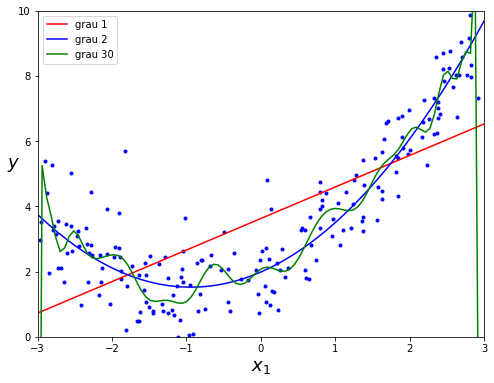

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

RAND_SEED = 42

np.random.seed(RAND_SEED)

m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


plt.figure(figsize=(8,6))
plt.plot(X, y, "b.", linewidth=3)

X_test = np.linspace(-3, 3, num=100).T

# Experimento 1: grau baixo.
poly_reg_1 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())
    ])
poly_reg_1.fit(X, y)
y_test = poly_reg_1.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_test, 'r-', label='grau 1')

# Experimento 2: grau adequdo.
poly_reg_2 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())
    ])
poly_reg_2.fit(X, y)
y_test = poly_reg_2.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_test, 'b-', label='grau 2')

# Experimento 3: grau muito alto.
poly_reg_30 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())
    ])
poly_reg_30.fit(X, y)
y_test = poly_reg_30.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_test, 'g-', label='grau 30')

plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [2]:
poly_reg_1.named_steps['lin_reg'].coef_, poly_reg_1.named_steps['lin_reg'].intercept_, 

(array([[1.70599862]]), array([3.5335268]))

In [3]:
poly_reg_2.named_steps['lin_reg'].coef_, poly_reg_2.named_steps['lin_reg'].intercept_, 

(array([[1.74378864, 1.37507481]]), array([3.5335268]))

In [4]:
poly_reg_30.named_steps['lin_reg'].coef_, poly_reg_30.named_steps['lin_reg'].intercept_, 

(array([[ 2.42849501e+00, -1.99487139e+01, -1.09883985e+02,
          1.39903553e+03,  2.44823234e+03, -3.29337047e+04,
         -1.70477571e+04,  4.23325130e+05, -3.59976879e+04,
         -3.46303342e+06,  1.32127228e+06,  1.93574405e+07,
         -9.75769581e+06, -7.67876489e+07,  4.04342916e+07,
          2.20681749e+08, -1.08933241e+08, -4.63652489e+08,
          2.00342823e+08,  7.11318973e+08, -2.54543892e+08,
         -7.87045425e+08,  2.20324412e+08,  6.10887645e+08,
         -1.24209790e+08, -3.15308199e+08,  4.11570630e+07,
          9.71185208e+07, -6.08454092e+06, -1.34993057e+07]]),
 array([3.53352698]))

# Regularização

Conforme vimos acima, um modelo muito complexo pode sofrer do problema de *overfitting*. Uma forma de domar a complexidade do modelo é limitar o número de *features*. Por exemplo, usando *features* polinomiais, podemos limitar o grau do polinômio.

Outra forma de tratar a complexidade dos modelos é através da estratégia de *regularização*. Trata-se do seguinte:

1. Definimos métricas diferentes de erro para a fase de treinamento e a fase de testes.
    - Na fase de treinamento usamos uma *métrica regularizada*
    - Na fase de testes usamos uma métrica convencional
    
2. A métrica regularizada funciona assim: trata-se da métrica convencional acrescida de um termo que *penaliza a complexidade do modelo*.

Com isso favorecemos modelos de complexidade reduzida, mesmo que o grau do polinômio seja alto.

## Ridge, Lasso e ElasticNet

Nestas modalidades de regularização adicionamos uma penalidade para a norma do vetor de parâmetros:

- Ridge: a penalidade é proporcional à norma $L_2$ do vetor de parâmetros.

- Lasso: a penalidade é proporcional à norma $L_1$ do vetor de parâmetros.

- ElasticNet: uma soma ponderada de penalidades proporcionais às normas $L_1$ e $L_2$ do vetor de parâmetros é aplicada.


**Atividade:** O material do livro-texto, na seção "Regularized Linear Models" está muito bom, estude este material e responda:

- Qual a diferença entre *ridge regression*, *lasso regression*, e *elastic net*?

**R:** 
- O Ridge penaliza parametros de theta somando alpha vezes o somatórios dos thetas ao quadrado.
- O Lasso penaliza os parametros de theta somando alpha vezes o somatórios dos modulos de thetas. O Lasso zera parametros considerados inúteis.
- O Elastic net penaliza parametros de theta somando uma combinação linear dos somatórios de thetas ao quadrado e modulo de theta. Ele também zera os parametros inúteis.

Eis aqui uma demonstração das várias regularizações:

In [17]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def experiment(msg, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    
    model = pipeline.named_steps['lin_reg']
    print('{}: \nintercept = {},\ncoefs = {}'.format(msg, model.intercept_, model.coef_))
    
    y_pred = pipeline.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
    print('RMSE: {}'.format(RMSE))
    print()
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_SEED)

alpha = 1e-1

# Testa o fit do poly_reg_2.
experiment('Fit de grau 2, sem regularização', poly_reg_2, X_train, y_train, X_test, y_test)

# Testa o fit do poly_reg_30.
experiment('Fit de grau 30, sem regularização', poly_reg_30, X_train, y_train, X_test, y_test)

# Testa o fit da regularização ridge. 
poly_reg_ridge = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", Ridge(alpha=alpha))
    ])
experiment('Fit de grau 30, regularização ridge', poly_reg_ridge, X_train, y_train, X_test, y_test)

# Test o fit da regularização lasso.
poly_reg_lasso = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", Lasso(alpha=alpha))
    ])
experiment('Fit de grau 30, regularização lasso', poly_reg_lasso, X_train, y_train, X_test, y_test)

# Test o fit da regularização elastic net.
poly_reg_elasticnet = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=RAND_SEED))
    ])
experiment('Fit de grau 30, regularização elastic net', poly_reg_elasticnet, X_train, y_train, X_test, y_test)

Fit de grau 2, sem regularização: 
intercept = [3.51810673],
coefs = [[1.79596938 1.3530664 ]]
RMSE: 1.0355659626527138

Fit de grau 30, sem regularização: 
intercept = [3.51810685],
coefs = [[ 2.00290339e+00 -1.79318079e+01 -1.80452197e+02  1.50304158e+03
   5.62388026e+03 -3.82816559e+04 -7.57859928e+04  5.07698003e+05
   5.89801137e+05 -4.15770638e+06 -2.98492984e+06  2.28224687e+07
   1.04602646e+07 -8.78708426e+07 -2.62882413e+07  2.43486724e+08
   4.81976364e+07 -4.91618078e+08 -6.46500981e+07  7.24021886e+08
   6.27462160e+07 -7.69272890e+08 -4.28434154e+07  5.74061592e+08
   1.94821758e+07 -2.85359394e+08 -5.28384023e+06  8.48146317e+07
   6.44772599e+05 -1.13992935e+07]]
RMSE: 1.2177370231839166

Fit de grau 30, regularização ridge: 
intercept = [3.51810673],
coefs = [[ 2.41527131  0.85388097 -0.69043196  1.4911326  -0.96543828 -0.13475928
   0.31401816 -0.99144605  0.87505326 -0.92500502  0.77086085 -0.46697586
   0.35590491  0.02732795 -0.11337578  0.40479405 -0.49197203  0.

**Atividade:** 

- Coloque o $\alpha$ bem alto, o que acontece?

- Coloque o $\alpha$ muito baixo, o que acontece?

- Explique a diferença observada entre sem regularização / regularização ridge / regularização lasso / regularização elastic net.

**R:**
- Os parametros tendem a serem muito pequenos. No Ridge os parametros tendem a zero enquanto no Lasso e Elastic Net, eles realmente zeram.
- Com o alpha muito pequeno é como se os parametros não fossem penalizados, tornando quase identico a uma regressão linear convencional.
- Pontos abaixo:
    - Sem regularização: Parametros muitos altos(faixa de 10^8) e maior erro entre todos.
    - Ridge: Parametros mais comportados, maioria entre -1 e 1 para alpha 0.1, e erro menor que sem regularização.
    - Lasso e Elastic Net: parametros comportados na mesma faixa do Ridge, porém diversos deles foram zerados, menor erro entre todos.

## Regularização por parada prematura (*early stopping*)

Um modo bizarro de regularização é o chamado *early stopping*.

Considere o algoritmo de treinamento *gradient descent*. Quanto mais iteramos neste algoritmo (em machine learning, as iterações são chamadas **epochs**), menor o *erro de treinamento*. Porém, se acompanharmos o *erro de validação* à cada epoch, vemos que este decresce com as epochs até um certo ponto, *e depois começa a subir novamente*!

<img src="early_stopping_plot.png" alt="Regularização por parada prematura" style="width: 600px;"/>


**Atividade:** Por que isso acontece?

**R:**
- Isso ocorre pois o modelo começa a sofrer com overfitting, visto que ele começa a se adequar demais aos dados de treinamento.

Continuando:

Portanto, se detectarmos que o erro de validação está realmente subindo, podemos parar com o processo de treinamento e adotar o modelo resultante como o nosso modelo treinado! Esta estratégia de *parada prematura* (early stopping) é surpreendentemente simples e eficaz!

# Interpretabilidade

In [18]:
import statsmodels.api as sm

In [53]:
poly_30 = PolynomialFeatures(degree=10, include_bias=True)
Xb = poly_30.fit_transform(X)

model = sm.OLS(y, Xb)
results = model.fit()

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.02e-70
Time:                        20:55:15   Log-Likelihood:                -272.52
No. Observations:                 200   AIC:                             567.0
Df Residuals:                     189   BIC:                             603.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1052      0.199     10.595      0.000       1.713       2.497
x1             0.9321      0.395      2.358      0.019       0.152       1.712
x2             0.2032      0.604      0.337      0.737      -0.987       1.394
x3             0.4864      0.500      0.973      0.332      -0.500       1.473
x4             0.1794      0.502      0.357      0.721      -0.812       1.170
x5            -0.2587      0.202     -1.283      0.201      -0.657       0.139
x6            -0.0369      0.161     -0.229      0.819      -0.354       0.280
x7             0.0441      0.032      1.393      0.165      -0.018       0.107
x8             0.0034      0.022      0.154      0.878      -0.039       0.046
x9            -0.0024      0.002     -1.430      0.154      -0.006       0.001
x10           -0.0001      0.001     -0.117      0.907      -0.002       0.002
==============================================================================
Omnibus:                        8.494   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.618
Skew:                           0.358   Prob(JB):                      0.00816
Kurtosis:                       3.801   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Atividade:**

Experimente com diferentes valores para o grau do polinômio: 1, 2, 5, 10. Relate o que você observou

**R:** 
- Grau 1: Todos os coeficientes são significativos (P>|t| = 0.0), porém tem R-squared baixo. Não se ajustando bem aos pontos.
- Grau 2: Todos os coeficientes são significativos (P>|t| = 0.0), tem R-squared mais alto, se ajustando melhor ao modelo.
- Grau 5: Apenas os 3 primeiros coeficientes são significativos, os outros possuem P>|t| altos, podendo ser descartados. Possui R-squared alto, porém isso se justifica devido ao overfitting de dados.
- Grau 10: Apenas o primeiro coeficiente possui P>|t| = 0.0, todos os outros possuem esse valor alto, podendo ser descartados. Possui R-squared ainda mais alto, devido ao overfitting de dados.